In [1]:
import pandas as pd
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import warnings
warnings.filterwarnings("ignore" , category = FutureWarning)

In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [7]:
tesla = yf.Ticker("TSLA")
print (tesla)

yfinance.Ticker object <TSLA>


In [15]:
tesla_data = tesla.history(period = "max")

In [17]:
tesla_data.reset_index(inplace = True)

In [19]:
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [23]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [27]:
html_data = requests.get(url).text

In [37]:
soup = BeautifulSoup(html_data, 'html5lib')

In [39]:
tesla_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

In [61]:
tables = soup.find_all('table')
for table in tables:
    if table.find(string = "Tesla Quarterly Revenue"):
        reqd_table = table

In [63]:
rows = []
for row in reqd_table.find_all('tr')[1:]:
    columns = row.find_all('td')
    if len(columns) >= 2:
        date = columns[0].text
        revenue = columns[1].text
        rows.append({'Date':date , "Revenue" : revenue})
tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame(rows)], ignore_index = True)

In [125]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|$',"")

In [127]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [129]:
tesla_revenue.tail(5)

,Date,Revenue
49,2010-09-30,31
50,2010-06-30,28
51,2010-03-31,21
53,2009-09-30,46
54,2009-06-30,27


In [131]:
gamestop = yf.Ticker("GME")
print (gamestop)

yfinance.Ticker object <GME>


In [133]:
gme_data = gamestop.history(period = "max")

In [134]:
gme_data.reset_index(inplace = True)

In [137]:
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [200]:
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [202]:
html_data_2 = requests.get(url2).text

In [204]:
soup = BeautifulSoup(html_data_2, 'html5lib')

In [206]:
gme_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

In [208]:
tables = soup.find_all('table')
for table in tables:
    if table.find(string = "GameStop Quarterly Revenue"):
        reqd_table = table

In [210]:
rows = []
for row in reqd_table.find_all('tr')[1:]:
    columns = row.find_all('td')
    if len(columns) >= 2:
        date = columns[0].text
        revenue = columns[1].text
        rows.append({'Date':date , "Revenue" : revenue})
gme_revenue = pd.concat([gme_revenue, pd.DataFrame(rows)], ignore_index = True)

In [220]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace('$',"",regex=True)

In [222]:
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [224]:
gme_revenue.tail(5)

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


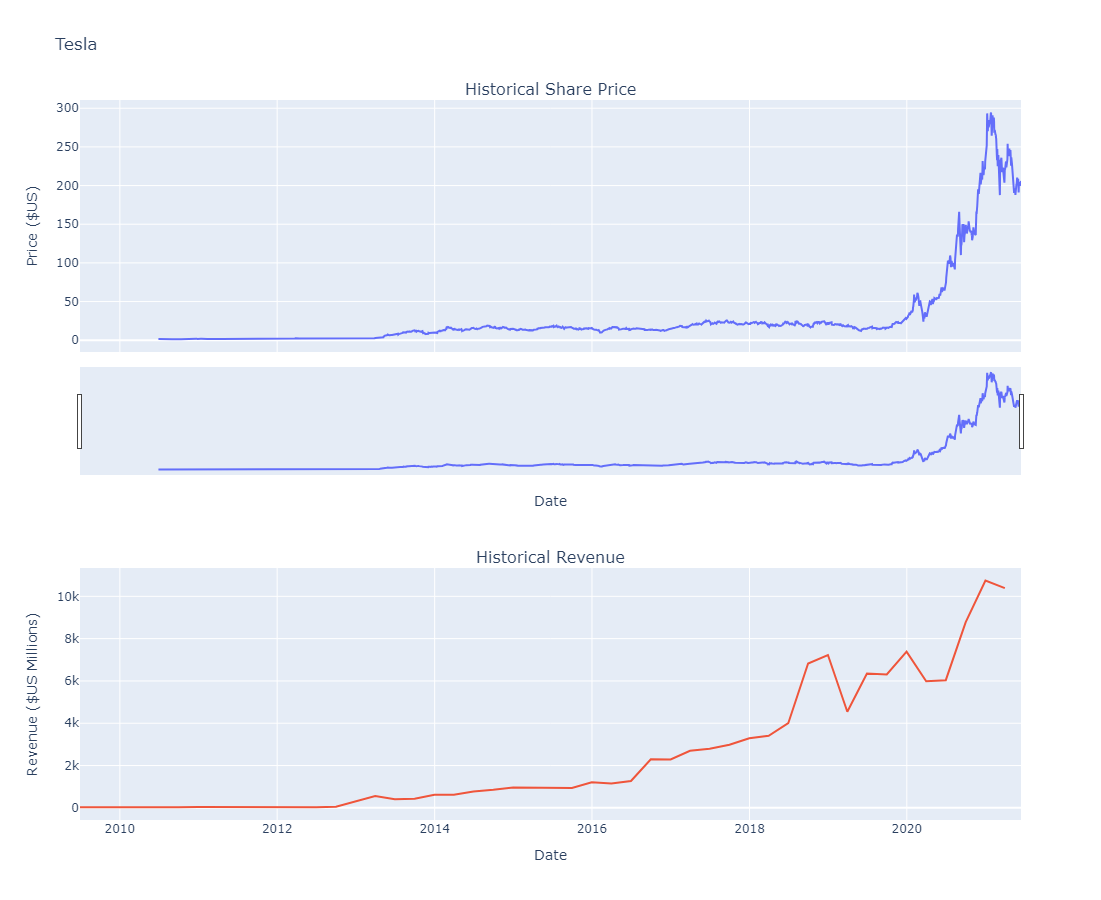

In [226]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

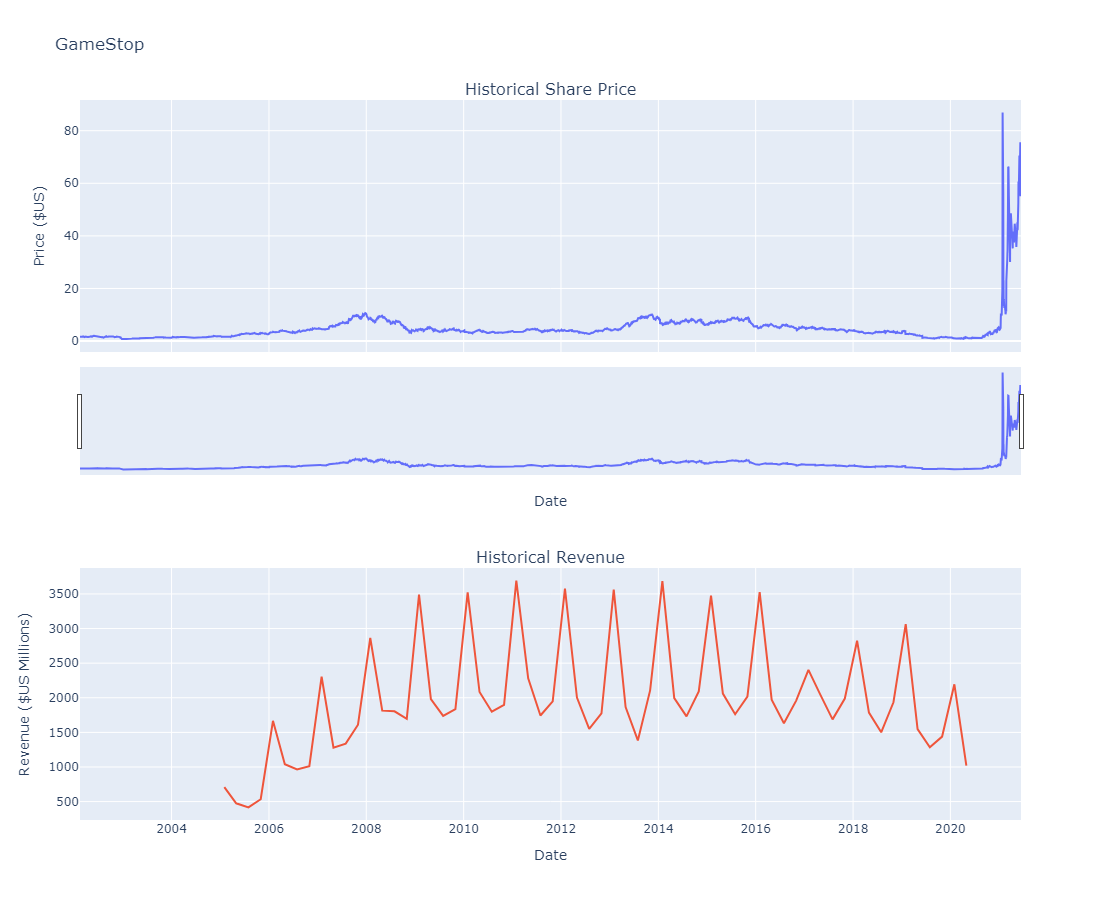

In [228]:
make_graph(gme_data, gme_revenue, 'GameStop')